# Credit Card Fraud Detection with Machine Learning Models
## Data Exploration and Preperation
### Ian Heung

In this project, I will use a dataset from Kaggle and develop machine learning models to determine whether a transaction is fraudulent or not. The dataset is highly unbalanced, with the number of fraud cases only accounting for **only 0.172%** of transactions. I will navigate the challenge of the class imbalance in the dataset and develop machine learning models for accurate classification of the transactions.

## Data Overview

The dataset composes of credit card transactions made by European cardholders during September 2013, spanning a period of two days. There are 492 fraud cases out of a total of 284,807 transactions. This dataset is heavily imbalanced, with the positive class (fraud cases) comprising only 0.172% of all transactions.

With the expection of Time and Amount, all input variables have undergone a Principal Component Analysis (PCA) transformation to protect confidentiality. As a result, the original features and further background details are not included. 

Key aspects of the dataset are as follows:

- Features V1 through V28 represent the principal components derived via PCA.
- Two features, Time and Amount, remain untransformed. Time represents the seconds that have elapsed since the first transaction, and Amount reflects the transaction value, which may be useful for implementing cost-sensitive learning models.
- The target variable, Class, indicates whether a transaction is fraudulent (1) or not (0).

## Objectives
- Explore and understand the dataset given the limited information we have about the PCA transformed features
- Formulate solutions and workarounds to the class imbalance problem
- Use various model solutions and architectures and evaluate which best fits our usecase
- Determine the appropriate evaluation metrics

In [1]:
# imports
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

## Data Exploration

#### Preliminary Data Exploration

Lets conduct an initial glimpse of our data

In [2]:
filepath = 'creditcard.csv' # change filepath accordingly 
df = pd.read_csv(filepath)
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.isnull().sum().sum()

0

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
num_non_fraud = df['Class'].value_counts()[0] # number of non-fraudulent transactions
num_fraud = df['Class'].value_counts()[1] # number of fraudulent transactions
no_fraud_percent = round(df['Class'].value_counts()[0]/len(df) * 100,2) # percentage of non-fraudulent transactions
fraud_percent = round(df['Class'].value_counts()[1]/len(df) * 100,2) # percentage of fraudulent transactions

print('No Frauds: ',num_non_fraud , f'({no_fraud_percent}%)')
print('Frauds: ', num_fraud, f'({fraud_percent}%)')

No Frauds:  284315 (99.83%)
Frauds:  492 (0.17%)


#### Visualizations
As mentioned earlier, our dataset is very imbalanced. Most transactions are non-fraud, while only **0.17%** of the data is fraudulent. Thinking ahead about our classification models, we need to figure out a way to deal with this imbalance to prevent model overfitting. We can also visualize how imbalanced the data actually is.

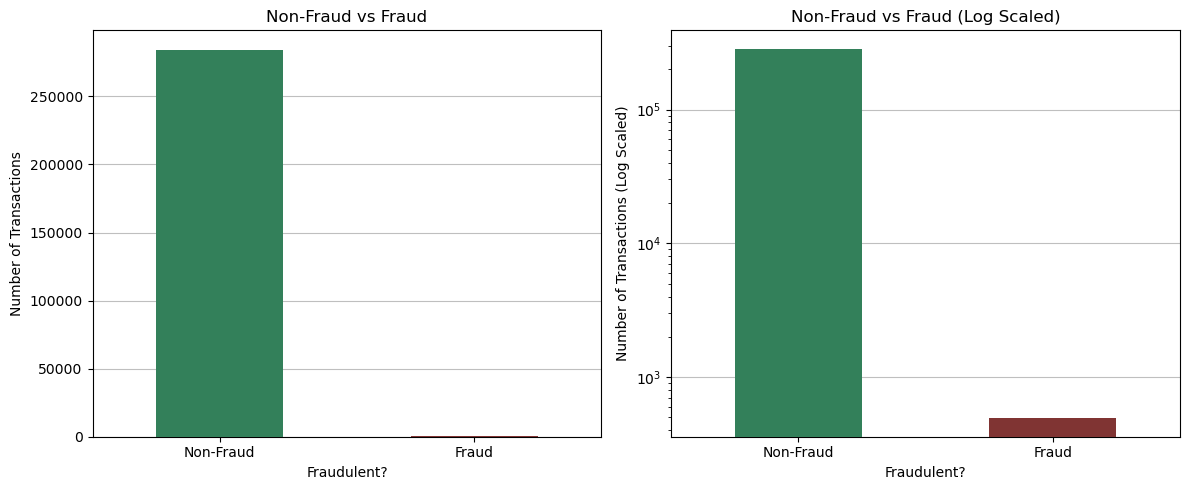

In [7]:
class_counts = df['Class'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax1 = class_counts.plot(kind='bar', ax=axes[0], color=['#33805a', '#803433'], zorder=3)
ax1.grid(color='gray', axis='y', alpha=0.5, zorder=1)
ax1.set_xticklabels(['Non-Fraud', 'Fraud'])
ax1.set_title('Non-Fraud vs Fraud')
ax1.set_xlabel('Fraudulent?')
ax1.set_ylabel('Number of Transactions')
ax1.set_xticklabels(['Non-Fraud', 'Fraud'], rotation=0)

ax2 = class_counts.plot(kind='bar', ax=axes[1], color=['#33805a', '#803433'], zorder=3, logy=True)
ax2.grid(color='gray', axis='y', alpha=0.5, zorder=1)
ax2.set_xticklabels(['Non-Fraud', 'Fraud'])
ax2.set_title('Non-Fraud vs Fraud (Log Scaled)')
ax2.set_xlabel('Fraudulent?')
ax2.set_ylabel('Number of Transactions (Log Scaled)')
ax2.set_xticklabels(['Non-Fraud', 'Fraud'], rotation=0)

plt.tight_layout()

plt.show()


We see even in the log scaled plot, the number of non-fraud cases still overwhelmingly outnumbers the number of fraud cases.

Lets now see histogram distributions of the time and transaction amount values to see the data spread. 

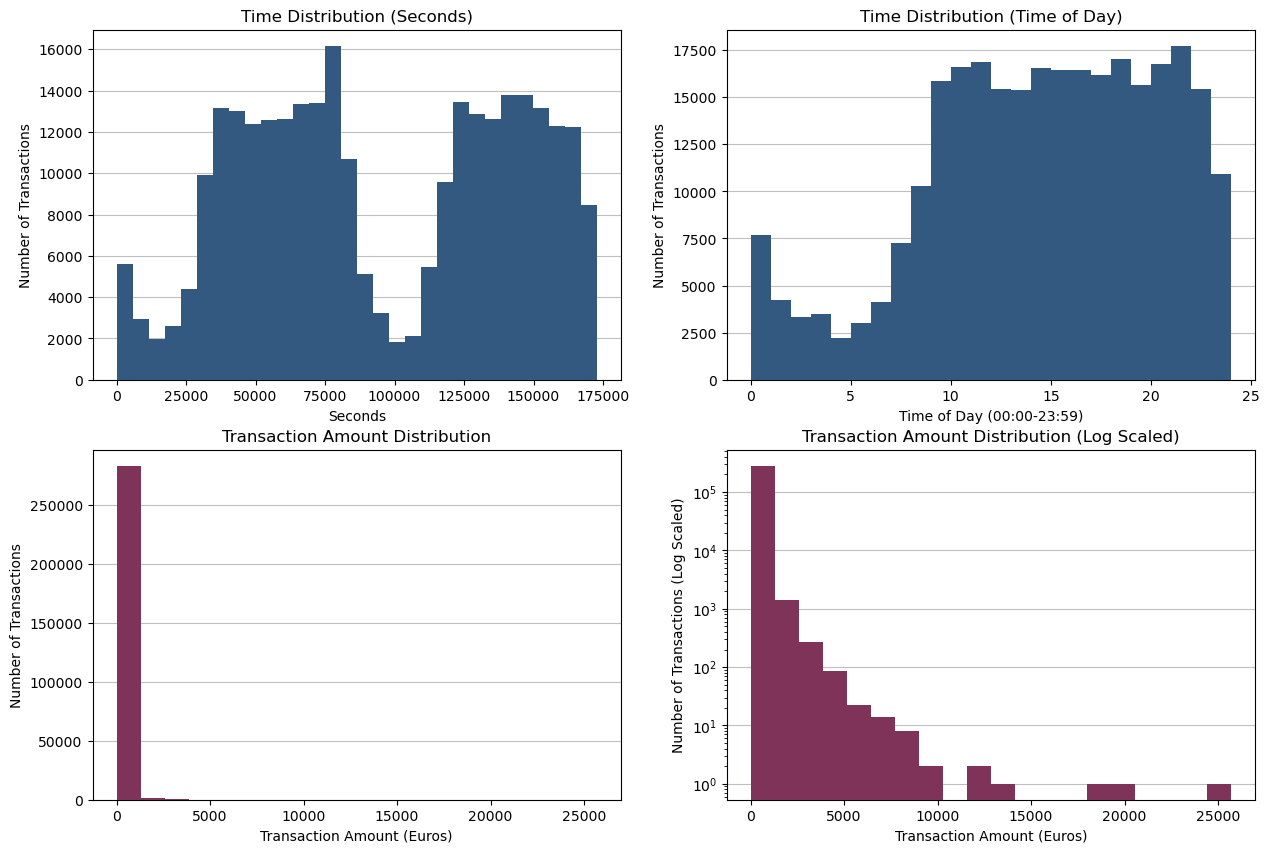

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# seconds histogram
ax1 = df['Time'].plot(kind='hist', bins=30, ax=axes[0][0], color='#335980', zorder=3)
ax1.grid(color='gray', axis='y', alpha=0.5, zorder=1)
ax1.set_title('Time Distribution (Seconds)')
ax1.set_xlabel('Seconds')
ax1.set_ylabel('Number of Transactions')

# convert the seconds to hours for easier interpretation
def convert_seconds(x):
    
    DAY = 86400
    # we assume that 0 seconds marks the start of a new day, 00:00 AM
    hour = x / DAY * 24
    # since the dataset spans two days, convert the second day entries into hour of day
    # eg. if hour = 36, it means 12:00 PM on the second day, so return 12
    if hour >= 24:
        hour = hour - 24
    return hour

df['transaction_time'] = df['Time'].apply(lambda x: convert_seconds(x))

# hours histogram
ax2 = df['transaction_time'].plot(kind='hist', bins=24, ax=axes[0][1], color='#335980', zorder=3)
ax2.grid(color='gray', axis='y', alpha=0.5, zorder=1)
ax2.set_title('Time Distribution (Time of Day)')
ax2.set_xlabel('Time of Day (00:00-23:59)')
ax2.set_ylabel('Number of Transactions')

# transaction amount histogram
ax3 = df['Amount'].plot(kind='hist', bins=20, ax=axes[1][0], color='#803359', zorder=3)
ax3.grid(color='gray', axis='y', alpha=0.5, zorder=1)
ax3.set_title('Transaction Amount Distribution')
ax3.set_xlabel('Transaction Amount (Euros)')
ax3.set_ylabel('Number of Transactions')

# transaction amount histogram log scaled
ax4 = df['Amount'].plot(kind='hist', bins=20, ax=axes[1][1], color='#803359', zorder=3, logy=True)
ax4.grid(color='gray', axis='y', alpha=0.5, zorder=1)
ax4.set_title('Transaction Amount Distribution (Log Scaled)')
ax4.set_xlabel('Transaction Amount (Euros)')
ax4.set_ylabel('Number of Transactions (Log Scaled)')

plt.show()


The top left plot is the distribution of transactions across two days, which is why we see two dips in transaction activity, as those dips are midnight hours when we expect transaction activity to be at its lowest. Thne we see an increase and a gradual plateau. If we look at the top right plot where we converted the seconds into hours of the day, we see on the x-axis a scale from 0 - 24, indicating the time of day. The plateau begins at around 09:00, and ends at 22:00.

The bottom left plot shows the transaction amount distribution, and we see most transactions are within €0 - €1250. There is a large range of transactions, but almost all the transaction amounts are within the €0 - €1250 range. If we use log scaling, we can view the distribution with more clarity. On the bottom right, we see a log scaled distribution of the transaction amounts. We see that the largest transactions make up an insignificant proportion of the total number of transactions.

We will now compare the differences in distributions of fraudulent and non-fraudulent transactions by overlaying them over each other for transaction time and transaction amount respectively.  

In [9]:
# first, compare the aggregate statistics after grouping the classes
df[['Class','transaction_time']].groupby('Class').describe()

transaction_time                                                       \
                 count       mean       std       min        25%        50%   
Class                                                                         
0             284315.0  14.542106  5.844597  0.000000  10.601389  15.014167   
1                492.0  12.136986  6.719614  0.112778   5.923819  12.052361   

                             
             75%        max  
Class                        
0      19.332778  23.999444  
1      17.803681  23.993333

In [10]:
df[['Class','Amount']].groupby('Class').describe()

Amount                                                            
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87

We see that there aren't major differences between the classes for transaction time.

But for transaction amount, we see more differences. For the 25% and 50% quartiles, the transaction amount for fraudulent cases is much lower than non-fraudulent cases, but we see that for the 75% quartile, the transaction amount is much higher than non-fraudulent transactions. We also see that for non-fraudulent transactions, the maximum amount is much larger than for fraudulent transactions. To allow better visualization when plotting, we will remove non-fraudulent transactions (class 0) from our plotting to avoid disproportionately skewing the x-axis.

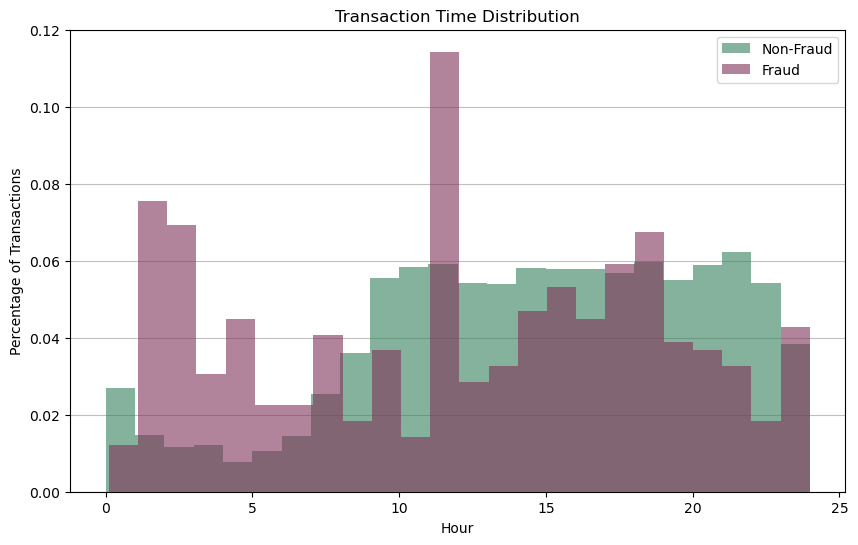

In [11]:
# split the classes
time_0 = df['transaction_time'].loc[df['Class'] == 0]
time_1 = df['transaction_time'].loc[df['Class'] == 1]

# overlay the plots
plt.figure(figsize=(10, 6))

ax = time_0.plot(kind='hist', bins=24, color='#33805a', zorder=3, alpha= 0.6, density=True)
ax = time_1.plot(kind='hist', bins=24, color='#803359', zorder=3, alpha= 0.6, density=True)
ax.grid(color='gray', axis='y', alpha=0.5, zorder=1)
ax.set_title('Transaction Time Distribution')
ax.set_xlabel('Hour')
ax.set_ylabel('Percentage of Transactions')
ax.legend(['Non-Fraud', 'Fraud'])

plt.show()


Our aggregate statistics showed not much difference between the two classes, but when we look at the distribution, we see a larger proportion of fraudlent cases occur during midnight. There is also a spike in fraudulent cases during 12:00. While the non-fraudulent transactions plateau, the fraudulent transactions are more sporadic.

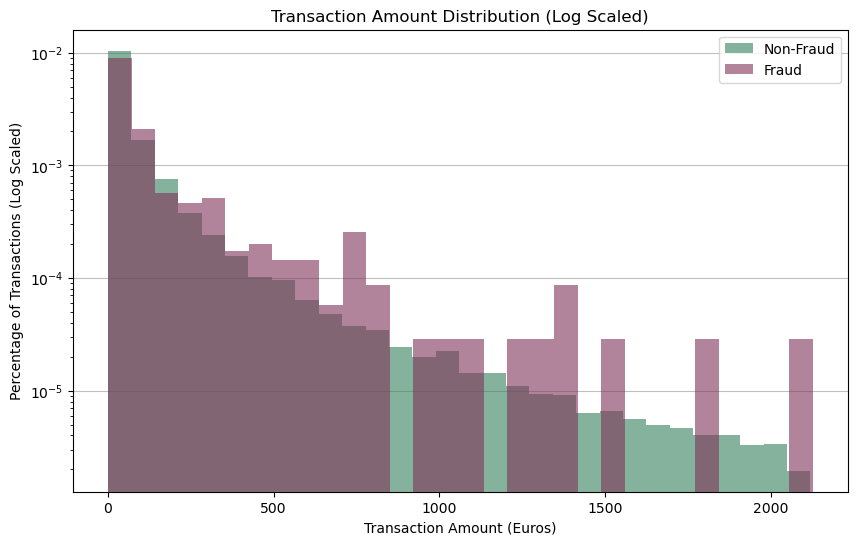

In [12]:
amount_0 = df['Amount'].loc[df['Class'] == 0]
amount_1 = df['Amount'].loc[df['Class'] == 1]

# set the threshold to the maximum amount in class 1
threshold = amount_1.max()

amount_0_filtered = amount_0[amount_0 <= threshold]

# # overlay the plots
plt.figure(figsize=(10, 6))

ax = amount_0_filtered.plot(kind='hist', bins=30, color='#33805a', zorder=3, logy=True, alpha= 0.6, density=True)
ax = amount_1.plot(kind='hist', bins=30, color='#803359', zorder=3, logy=True, alpha= 0.6, density=True)
ax.grid(color='gray', axis='y', alpha=0.5, zorder=1)
ax.set_title('Transaction Amount Distribution (Log Scaled)')
ax.set_xlabel('Transaction Amount (Euros)')
ax.set_ylabel('Percentage of Transactions (Log Scaled)')
ax.legend(['Non-Fraud', 'Fraud'])

plt.show()


The data for the two classes follow similiar trends, where as the transaction amount increases, there are less transactions. But for fraudulent cases, due to there not being as much data points, we the distribution is not exactly the same as non-fraudulent cases.

c:\Users\Ian\Anaconda3\envs\csc371\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


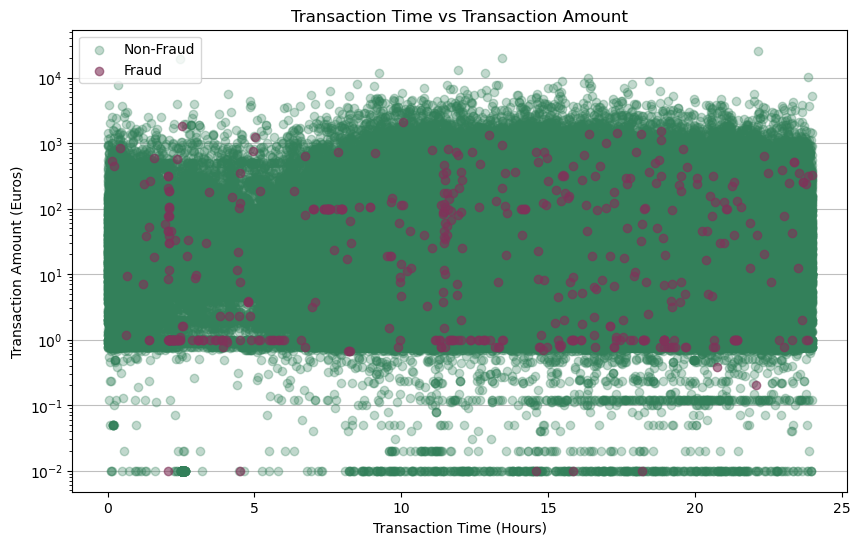

In [13]:
# scatter plot of transaction time vs transaction amount
plt.figure(figsize=(10, 6))
plt.scatter(time_0, amount_0, color='#33805a', zorder=3, alpha= 0.3)
plt.scatter(time_1, amount_1, color='#803359', zorder=3, alpha= 0.6)
plt.yscale('log')
plt.grid(color='gray', axis='y', alpha=0.5, zorder=1)
plt.title('Transaction Time vs Transaction Amount')
plt.xlabel('Transaction Time (Hours)')
plt.ylabel('Transaction Amount (Euros)')
plt.legend(['Non-Fraud', 'Fraud'])

plt.show()


This plot doesn't really help us see the relationship between the two variables, but we see that for non-fraudulent transactions, there is a big green blob, since there are much more non-fraudulent transactions. However, we notice there are some unique insights about the fraudulent transactions in this scatter plot. 

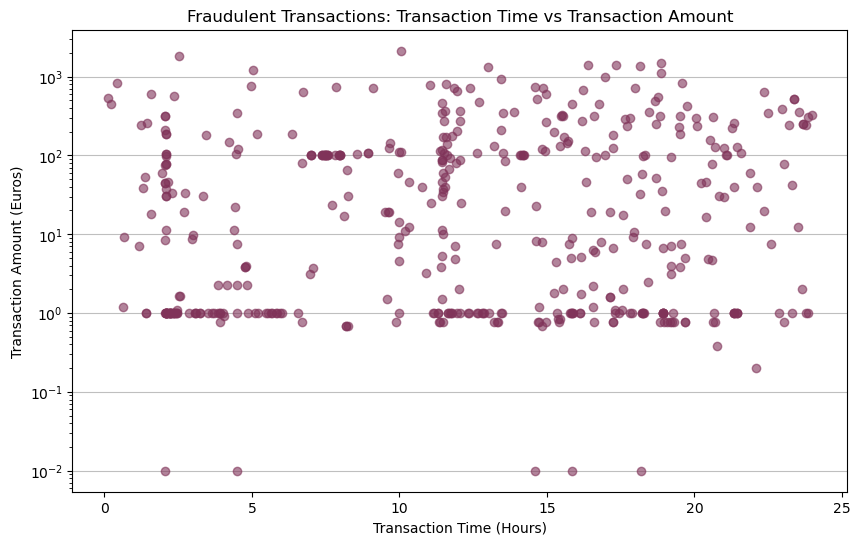

In [14]:
# scatter plot of transaction time vs transaction amount - fraudulent transactions only
plt.figure(figsize=(10, 6))
plt.scatter(time_1, amount_1, color='#803359', zorder=3, alpha= 0.6)
plt.yscale('log')
plt.grid(color='gray', axis='y', alpha=0.5, zorder=1)
plt.title('Fraudulent Transactions: Transaction Time vs Transaction Amount')
plt.xlabel('Transaction Time (Hours)')
plt.ylabel('Transaction Amount (Euros)')

plt.show()


We see that at around 2:00 and 12:00 exactly, there are a number of fraudulent transactions initiated at the same time. This might suggest there are internet bots trying to access payment information at scheduled time intervals. We also see a lot of transactions that are around 1 dollar. This might be done to check if a small payment can be sent through, which might be later followed by a much larger payment.

### Correlation Matrix

Since we have no information on what the PCA transformed features represent, we can run a correlation matrix to see if there are features that might be closely related. A correlation matrix shows the correlation coefficients of all the features. This coefficient tells us how closely a feature is correlated to another feature. A number close to 1 means the features are positively correlated, while a number close to -1 means the features are negatively correlated. A number closer to 0 means that the features have almost no correlation.

There is an issue with seaborn not displaying the correlation matrix correctly, so we update it to a new version. Restart kernal afterwards.

In [15]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


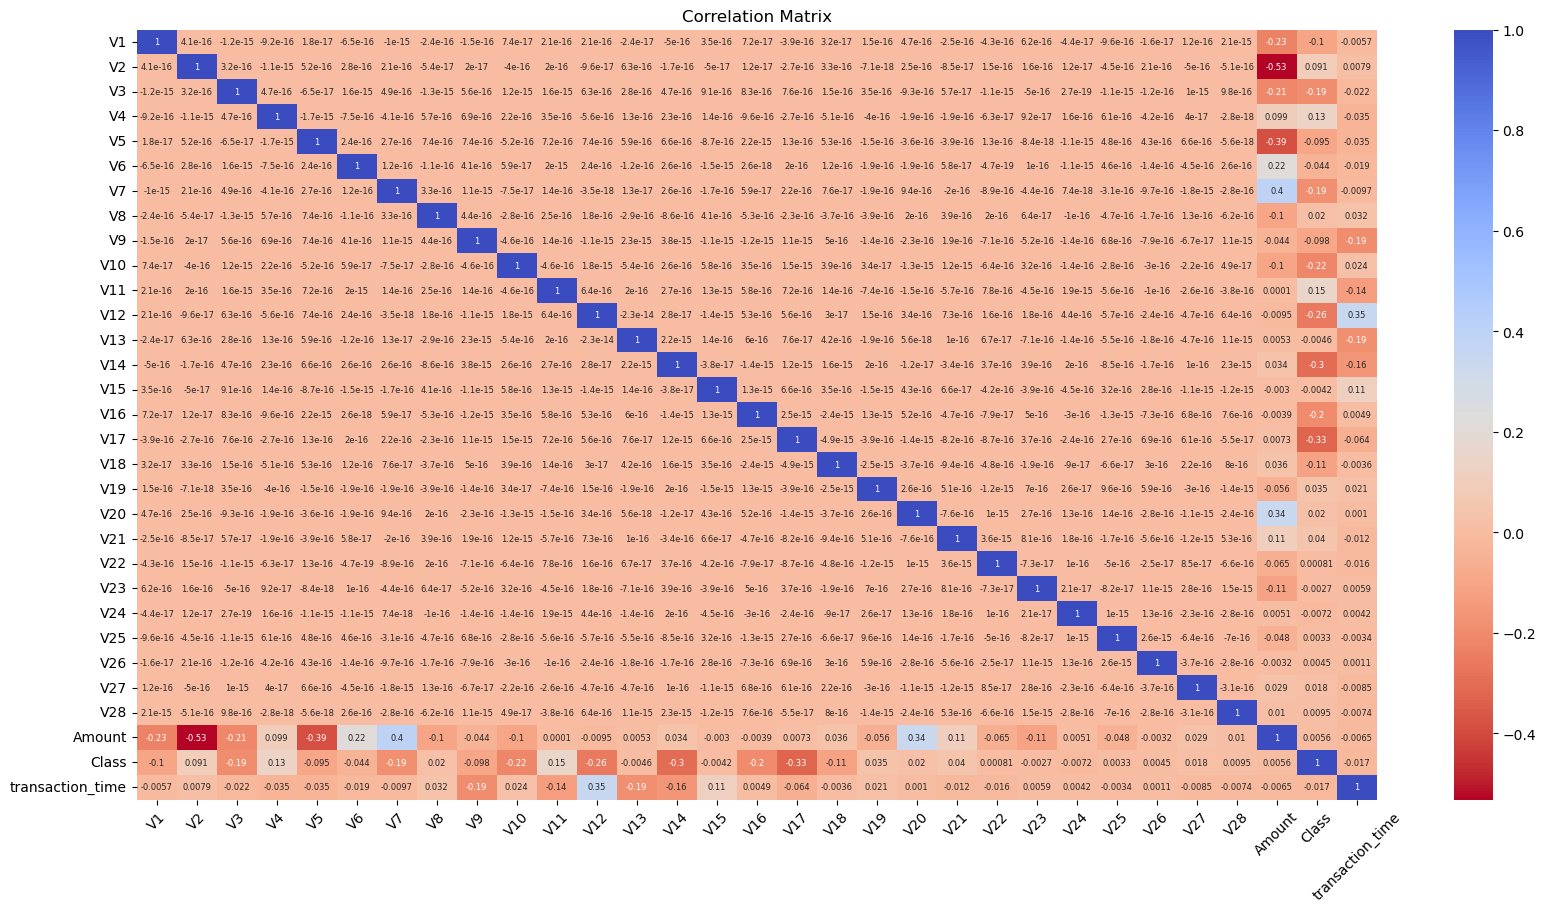

In [16]:
# drop the time column since we already have a new column, transaction_time that tells us the hour of the transaction
df.drop(columns='Time', inplace=True)
corr = df.corr()
plt.figure(figsize=(20, 10))
ax1 = plt.gca()
sns.heatmap(corr, cmap='coolwarm_r', annot=True, annot_kws={'size': 6}, ax=ax1)
ax1.set_title("Correlation Matrix")
plt.xticks(rotation=45)
plt.show()


We don't see much correlation between the PCA transformed features, but we see some correlation between the transaction amount, transaction time, and class.

**However,** we need to remember our data is heavily skewed towards non-fraud transactions. If one class dominates, the correlation matrix might reflect the characteristics of the dominant class, which can skew the strength of correlation coefficients. So we cannot interpret this correlation matrix as an accurate representation of the actual correlation relationships.

We have reached a point in our analysis where we need to consider data balancing for future analysis and model training.

## Data Scaling and Balancing

As mentioned above, we need create a balanced dataset to prevent overfitting of our models. But first, we need to scale our transaction amount and transaction time columns. We don't need to scale the PCA columns since they are already scaled. 

In [17]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_time'] = std_scaler.fit_transform(df['transaction_time'].values.reshape(-1,1))
# we use robust scaler for transactions because there are a lot of outliers, robust scaler is less prone to outliers 
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

# drop old columns
df.drop(columns=['transaction_time','Amount'], inplace=True)

In [18]:
# our newly scaled columns
df[['scaled_amount', 'scaled_time']].describe()

,scaled_amount,scaled_time
count,284807.000000,2.848070e+05
mean,0.927124,-6.450611e-16
std,3.495006,1.000002e+00
min,-0.307413,-2.486373e+00
25%,-0.229162,-6.738023e-01
50%,0.000000,8.087540e-02
75%,0.770838,8.195194e-01
max,358.683155,1.618165e+00


Before we proceed with sampling, we need to perform a train test split. Because we are not alloed to see the test data before any analysis, we will have to split the train and test set first. If we sampling the data now, it would be considered contaminated the test results, and we would not be truly learning for unseen data. If we maniputated the test set to have a 50% split between non-fraud and fraud cases, that would not be representative of the actual problem we are trying to solve. 

In [19]:
x = df.drop('Class', axis=1) # training features
y = df['Class'] # classes

# train-test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

Now we have performed our train test split, we can go ahead with undersampling the negative class (non-fraud transactions). We will want to make a dataset that is 50-50 that the classes are balanced. However, by doing so, we will be removing a large portion of our original data. This is a tradeoff we need to consider, as we need evaluate the tradeoff between less training data and preventing overfitting.

I believe that undersampling the negative class will be the correct decision, as it allows us to train the model on a more balanced dataset, making it more senestive to the patterns in the positive class (fraudulent transactions), which what we care most about. It is important to ensure the highest precision, as we want to have the least amount of false positives as possible. If a model overfits, even if accuracy is high, it is highly likely that there will be a higher number of false positives.

Lets first start by seeing how many fraudulent transactions there are in our training set.

In [20]:
# we concatenate the x_train and y_train back together so we can sample them
concat_train = pd.concat([xtrain, ytrain], axis=1)

# filter class specific dfs
fraud_train = concat_train.loc[concat_train['Class'] == 1]
non_fraud_train = concat_train.loc[concat_train['Class'] == 0]

num_fraud = len(fraud_train)
print("Number of Fraudulent Transactions (Positive Class): ", num_fraud)

Number of Fraudulent Transactions (Positive Class):  394


In [21]:
# undersample the non fraud transactions to match the number of fraud transactions without replacement 
non_fraud_train = non_fraud_train.sample(n=num_fraud, replace=False, random_state=42)

sampled_train = pd.concat([non_fraud_train, fraud_train], axis = 0)

# shuffle dataframe rows
sampled_train = sampled_train.sample(frac=1, random_state=24)

# the mean should be 0.5
sampled_train['Class'].describe()

count    788.000000
mean       0.500000
std        0.500318
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

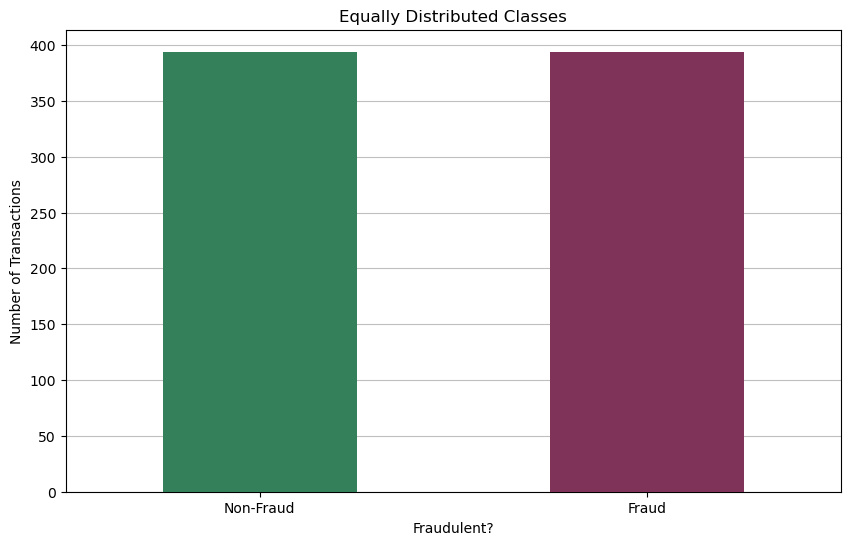

In [22]:
# seperate our training data back into x and y (features and labels)
xtrain_sampled = sampled_train.drop('Class', axis=1)
ytrain_sampled = sampled_train['Class']

# lets plot a bar chart to see our equally distributed classes now
plt.figure(figsize=(10,6))

ax = ytrain_sampled.value_counts().plot(kind='bar', ax=plt.gca(), color=['#33805a','#803359'], zorder=3)
ax.set_title('Equally Distributed Classes')
ax.set_xlabel('Fraudulent?')
ax.set_ylabel('Number of Transactions')
ax.grid(axis='y', color='gray', alpha=0.5, zorder=1)
ax.set_xticklabels(['Non-Fraud', 'Fraud'], rotation=0)

plt.show()

Lets now go back to our correlation matrix and try using our newly sampled data and see if there are any changes to confusion matrix.

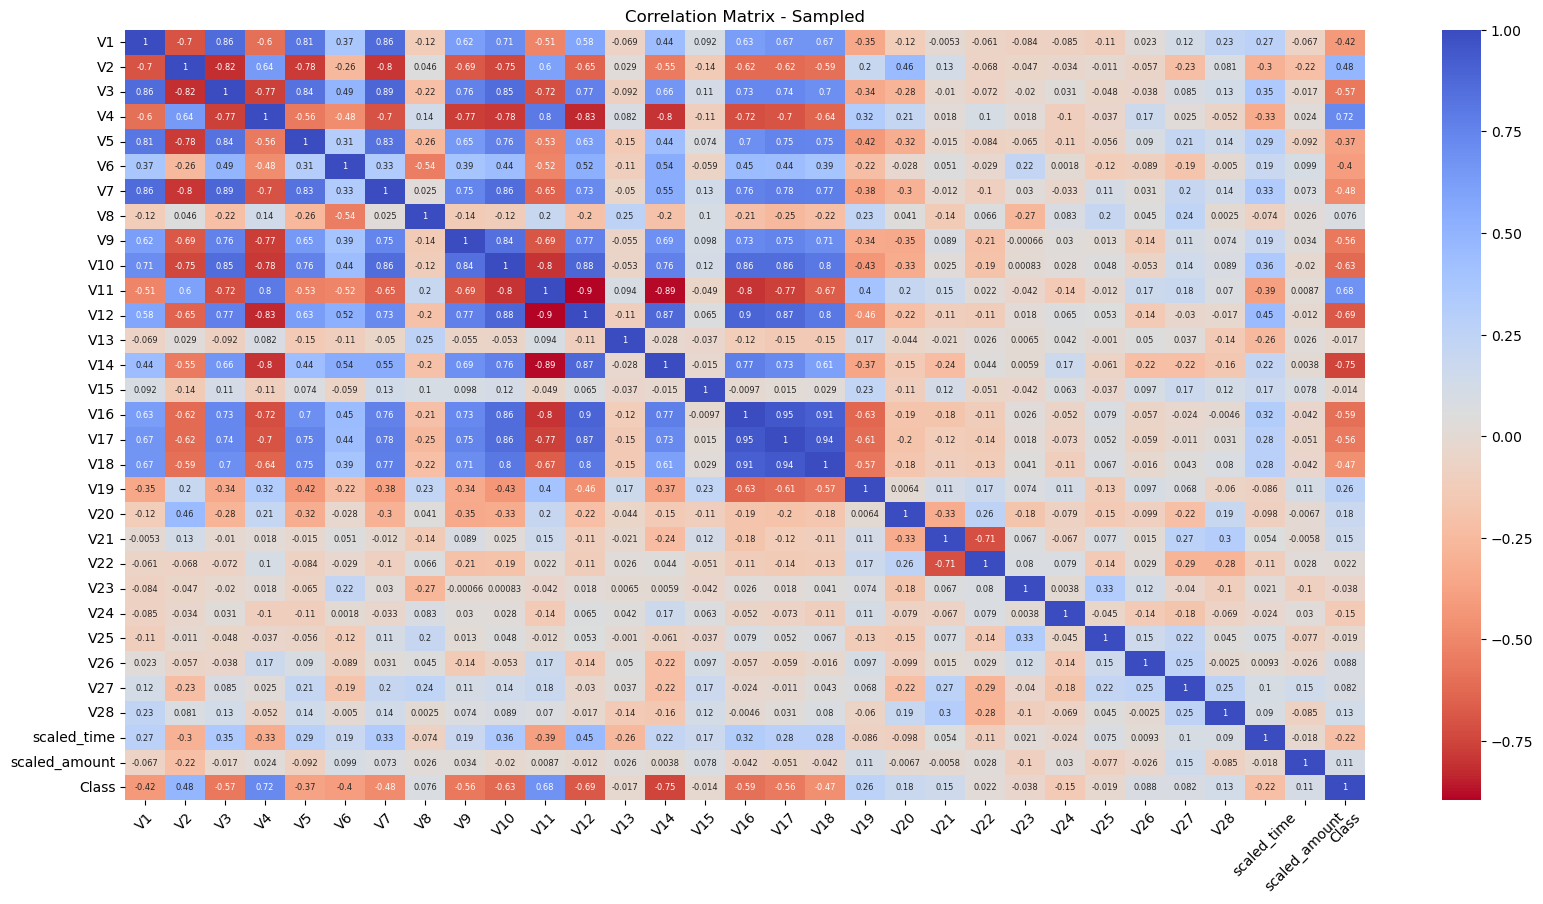

In [23]:
corr_sampled = sampled_train.corr()
plt.figure(figsize=(20, 10))
ax = plt.gca()
sns.heatmap(corr_sampled, cmap='coolwarm_r', annot=True, annot_kws={'size': 6}, ax=ax)
ax.set_title("Correlation Matrix - Sampled")
plt.xticks(rotation=45)
plt.show()

There is a lot more color variation in our correlation matrix now. We see that there are now more features that have strong positive and negative correlations with our labels (Class). To further analyze the correlation relationships, we select the features with the largest correlation coefficients and make box plots for each of them.

C:\Users\Ian\AppData\Local\Temp\ipykernel_15140\2571467018.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y=names, data=sampled_train, palette=colors, ax=ax)
C:\Users\Ian\AppData\Local\Temp\ipykernel_15140\2571467018.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud'])
C:\Users\Ian\AppData\Local\Temp\ipykernel_15140\2571467018.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y=names, data=sampled_train, palette=colors, ax=ax)
C:\Users\Ian\AppData\Local\Temp\ipykernel_15140\2571467018.py:22: UserWarning: set_ticklabels() should only b

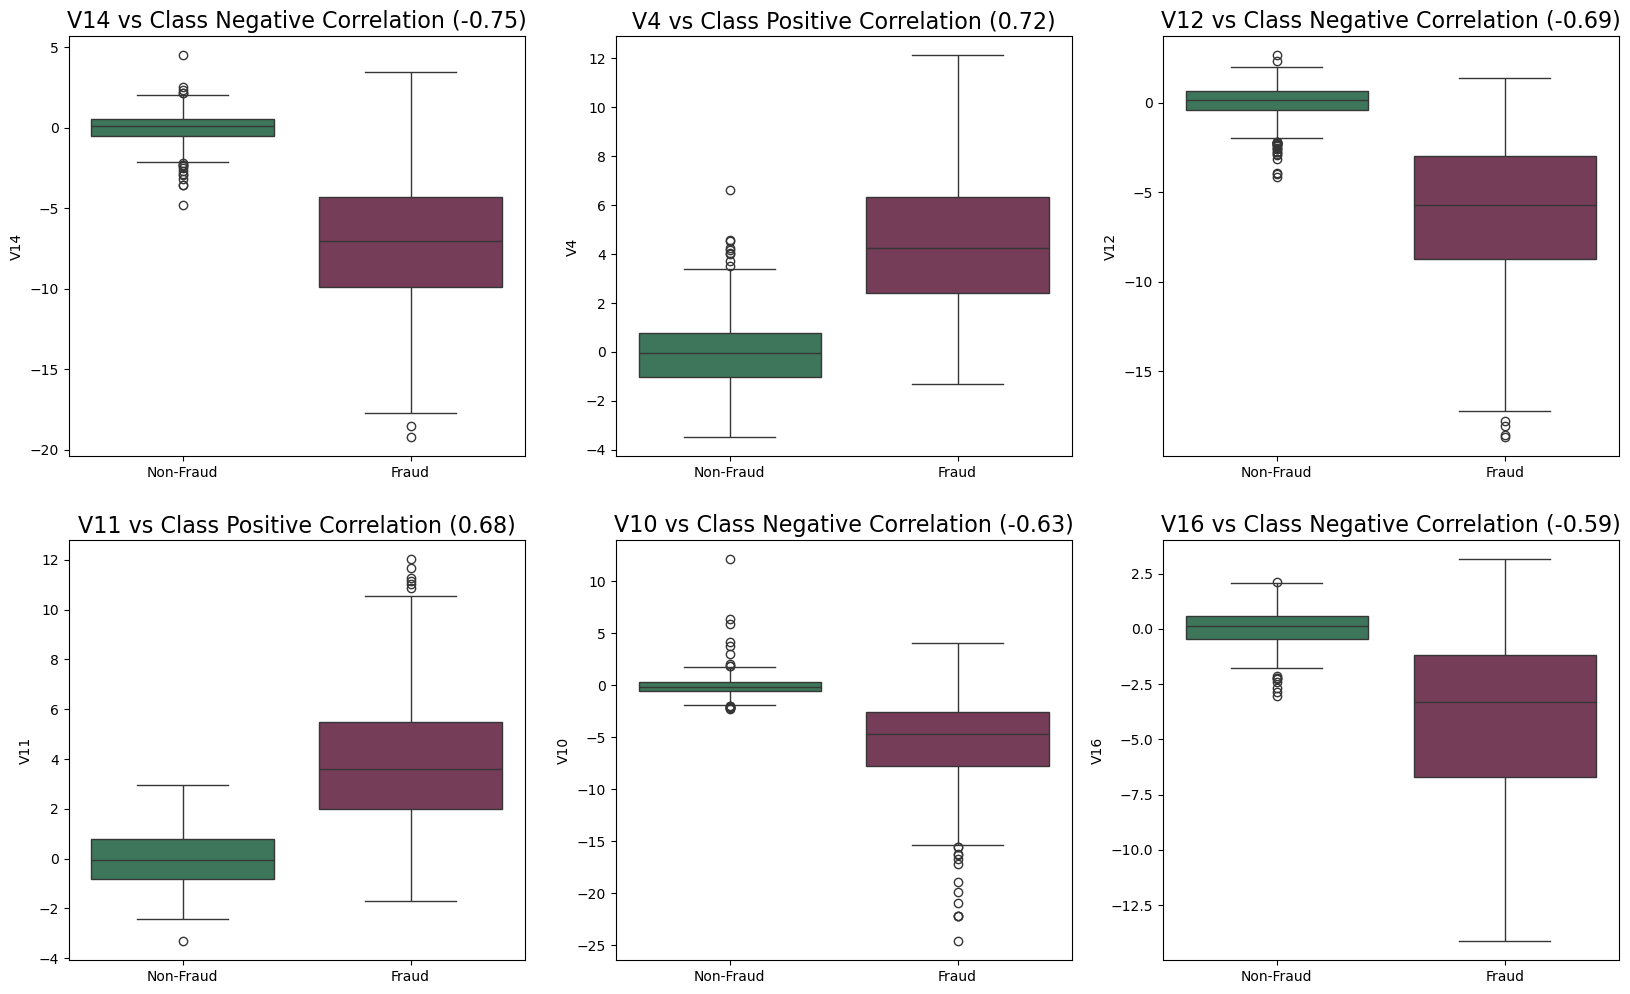

In [24]:
colors = ['#33805a', '#803359']

_, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# flatten axes array for iteration
axes = axes.flatten()

# feature name, plot title
names = [
    ('V14', 'V14 vs Class Negative Correlation (-0.75)'),
    ('V4', 'V4 vs Class Positive Correlation (0.72)'),
    ('V12', 'V12 vs Class Negative Correlation (-0.69)'),
    ('V11', 'V11 vs Class Positive Correlation (0.68)'),
    ('V10', 'V10 vs Class Negative Correlation (-0.63)'),
    ('V16', 'V16 vs Class Negative Correlation (-0.59)')
]

for ax, (names, title) in zip(axes, names):
    sns.boxplot(x="Class", y=names, data=sampled_train, palette=colors, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('')
    ax.set_xticklabels(['Non-Fraud', 'Fraud'])

plt.show()


We see that for the six most correlated features, there are a number of outliers that might affect model training. If we are to remove outliers, we should only remove those that overlap significantly with the opposite class's quartiles. It can also be noticed that most of the outliers that overlap are from non-fraud transactions. This is likely because of the larger range of data we sampled for non-fraud transactions and might also indicate that fraud transactions do not have as many extreme outliers in the PCA-transformed features.

To see the effect of removing outliers vs not removing outliers, we will train models with the outliers removed and models without the outliers removed to see how much of a difference it makes.

We will save the data and move to a different workspace for model training.

In [25]:
xtrain = xtrain.values
xtest = xtest.values
ytrain = ytrain.values
ytest = ytest.values

In [26]:
directory = 'data'

if not os.path.exists(directory):
    os.makedirs(directory)
    
np.save(os.path.join(directory, 'xtrain.npy'), xtrain)
np.save(os.path.join(directory, 'xtest.npy'), xtest)
np.save(os.path.join(directory, 'ytrain.npy'), ytrain)
np.save(os.path.join(directory, 'ytest.npy'), ytest)